In [117]:
import numpy as np
import pandas as pd
from pandas_datareader import data as pdr
import datetime as dt

import yfinance as yf
yf.pdr_override()
import matplotlib.pyplot as plt

%matplotlib inline

In [123]:
# get data of inifineon from yahoofinance
start = dt.datetime(2018, 1, 1)
end = dt.datetime(2023, 2, 1)
stocks = ['IFX.DE']
stock_df = pdr.get_data_yahoo(stocks, start, end)

# Set first data point of each month to be start of each month data
stock_df['year_month'] = stock_df.index - pd.offsets.MonthEnd(0) - pd.offsets.MonthBegin(1)
monthly_data = (stock_df.groupby([stock_df.index.year, stock_df.index.month]).first())
monthly_data = monthly_data.set_index(pd.to_datetime(monthly_data.year_month))
monthly_data.to_csv('IFX_DE.csv')

[*********************100%***********************]  1 of 1 completed


<Axes: xlabel='year_month'>

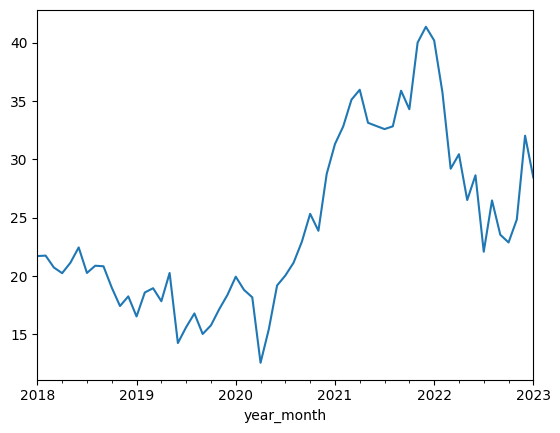

In [124]:
monthly_data['Adj Close'].plot()